In [20]:
import numpy as np 
import matplotlib.pyplot as plt

In [21]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [36]:
#Input datasets
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])
E = []
epochs = 15000
lr = 0.1
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

C:\Users\Paarth\Documents\Downloads\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


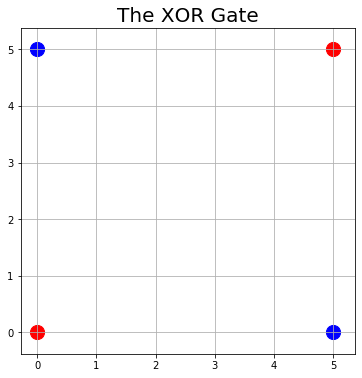

In [37]:
area = 200
fig = plt.figure(figsize=(6, 6))
plt.title('The XOR Gate', fontsize=20)
ax = fig.add_subplot(111)
# color red: is class 0 and color blue is class 1.
ax.scatter(0, 0, s=area, c='r', label="Class 0")
ax.scatter(0, 5, s=area, c='b', label="Class 1")
ax.scatter(5, 0, s=area, c='b', label="Class 1")
ax.scatter(5, 5, s=area, c='r', label="Class 0")
plt.grid()
plt.show()

In [38]:
#Random weights and bias initialization
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

print("Initial hidden weights: ",end='')
print(*hidden_weights)
print("Initial hidden biases: ",end='')
print(*hidden_bias)
print("Initial output weights: ",end='')
print(*output_weights)
print("Initial output biases: ",end='')
print(*output_bias)

Initial hidden weights: [0.03419161 0.2277246 ] [0.5603187  0.89607057]
Initial hidden biases: [0.10264377 0.70825103]
Initial output weights: [0.10701076] [0.41722486]
Initial output biases: [0.27806097]


In [39]:
#Training algorithm
for i in range(epochs):
    #Forward Propagation
    hidden_layer_activation = np.dot(inputs,hidden_weights)
    hidden_layer_activation += hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output,output_weights)
    output_layer_activation += output_bias
    predicted_output = sigmoid(output_layer_activation)

    #Backpropagation
    error = expected_output - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    #Updating Weights and Biases
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
    output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
    hidden_weights += inputs.T.dot(d_hidden_layer) * lr
    hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr
    e = np.mean(np.abs(error))
    E.append(e)
    if i%1000 == 0:
        print("Iteration:",[i]) 
        print("Error:", [e])
        

Iteration: [0]
Error: [0.4995287849858414]
Iteration: [1000]
Error: [0.49891211419407344]
Iteration: [2000]
Error: [0.4919851245098428]
Iteration: [3000]
Error: [0.44347287397182616]
Iteration: [4000]
Error: [0.3705695639767619]
Iteration: [5000]
Error: [0.21408076130616366]
Iteration: [6000]
Error: [0.1252258417903922]
Iteration: [7000]
Error: [0.0921001510194301]
Iteration: [8000]
Error: [0.07502468240217341]
Iteration: [9000]
Error: [0.06444225101713671]
Iteration: [10000]
Error: [0.0571437176688273]
Iteration: [11000]
Error: [0.05175176167105067]
Iteration: [12000]
Error: [0.04757381217897534]
Iteration: [13000]
Error: [0.044221510315663556]
Iteration: [14000]
Error: [0.04145909569236695]


In [40]:
print("Final hidden weights: ",end='')
print(*hidden_weights)
print("Final hidden bias: ",end='')
print(*hidden_bias)
print("Final output weights: ",end='')
print(*output_weights)
print("Final output bias: ",end='')
print(*output_bias)

print("\nOutput from neural network after 15,000 epochs: ",end='')
print(np.round(predicted_output))


Final hidden weights: [3.97321162 5.98181935] [3.98885385 6.05448278]
Final hidden bias: [-6.10713608 -2.58014644]
Final output weights: [-8.81564182] [8.12170393]
Final output bias: [-3.68282555]

Output from neural network after 15,000 epochs: [[0.]
 [1.]
 [1.]
 [0.]]


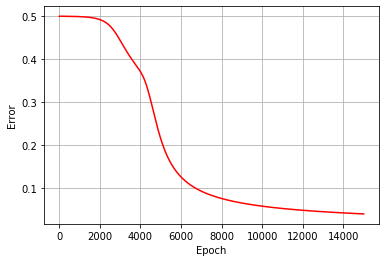

In [43]:
#plotting error vs epochs
plt.figure()
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(E, c='r')
plt.show()